# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
city = cities[2]
city

'port hueneme'

In [53]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': -119.1951, 'lat': 34.1478},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 59.07,
  'feels_like': 56.75,
  'temp_min': 53.98,
  'temp_max': 62.83,
  'pressure': 1013,
  'humidity': 44},
 'visibility': 10000,
 'wind': {'speed': 3.44, 'deg': 90},
 'clouds': {'all': 20},
 'dt': 1700042369,
 'sys': {'type': 1,
  'id': 5254,
  'country': 'US',
  'sunrise': 1700058574,
  'sunset': 1700096003},
 'timezone': -28800,
 'id': 5384339,
 'name': 'Port Hueneme',
 'cod': 200}

In [54]:
city_lat = city_weather['coord']['lat']
# city_lat= city_weather.get('coord', {}).get('lat',None)
city_lng = city_weather['coord']['lon']
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']

In [55]:
{"City": city, 
"Lat": city_lat, 
"Lng": city_lng, 
"Max Temp": city_max_temp,
"Humidity": city_humidity,
"Cloudiness": city_clouds,
"Wind Speed": city_wind,
"Country": city_country,
"Date": city_date}

{'City': 'port hueneme',
 'Lat': 34.1478,
 'Lng': -119.1951,
 'Max Temp': 62.83,
 'Humidity': 44,
 'Cloudiness': 20,
 'Wind Speed': 3.44,
 'Country': 'US',
 'Date': 1700042369}

In [57]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    city_weather = response.json()

    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lat= city_weather.get('coord', {}).get('lat',None)
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | makokou
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | port hueneme
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | lensk
Processing Record 6 of Set 1 | puerto baquerizo moreno
Processing Record 7 of Set 1 | we
'coord'
City we not found. Skipping...
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | grytviken
-----------------------------
Data Retrieval Complete      
-----------------------------


In [58]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          9
Lat           9
Lng           9
Max Temp      9
Humidity      9
Cloudiness    9
Wind Speed    9
Country       9
Date          9
dtype: int64

In [59]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,makokou,0.5738,12.8642,77.34,83,100,2.48,GA,1700042390
1,port-aux-francais,-49.3500,70.2167,39.36,66,7,26.98,TF,1700042392
2,port hueneme,34.1478,-119.1951,62.83,44,20,3.44,US,1700042369
3,albany,42.6001,-73.9662,31.73,89,24,1.34,US,1700042394
4,lensk,60.7253,114.9278,10.40,88,100,10.56,RU,1700042396


In [61]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [62]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,makokou,0.5738,12.8642,77.34,83,100,2.48,GA,1700042390
1,port-aux-francais,-49.3500,70.2167,39.36,66,7,26.98,TF,1700042392
2,port hueneme,34.1478,-119.1951,62.83,44,20,3.44,US,1700042369
3,albany,42.6001,-73.9662,31.73,89,24,1.34,US,1700042394
4,lensk,60.7253,114.9278,10.40,88,100,10.56,RU,1700042396


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

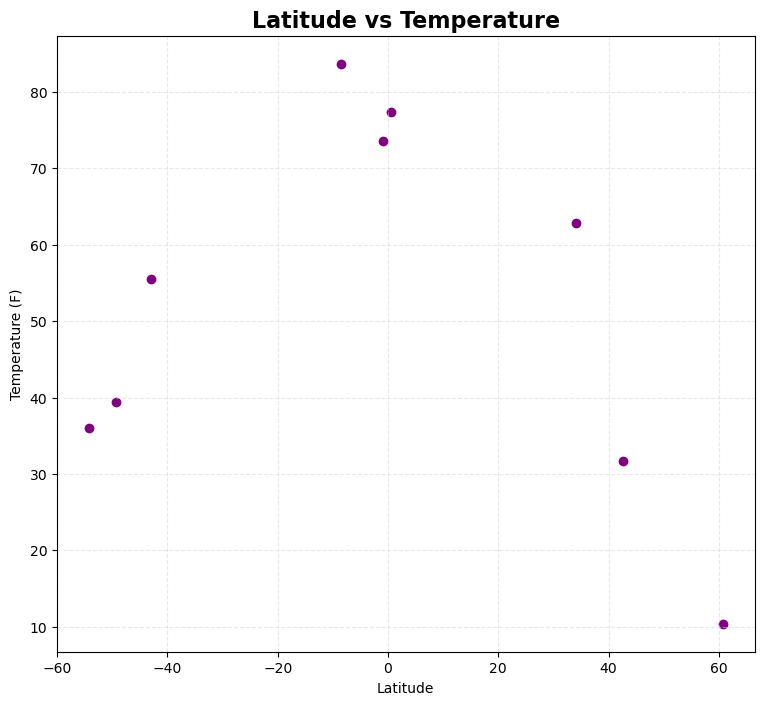

In [69]:
# Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties
# plot
plt.figure(figsize=(9,8))
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="purple")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

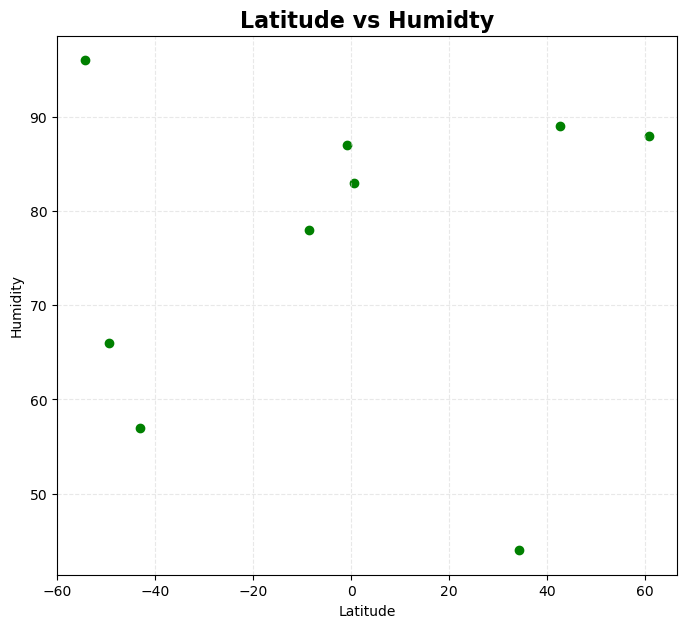

In [84]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,7))
plt.scatter(city_data_df.Lat, city_data_df["Humidity"], color="Green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidty", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

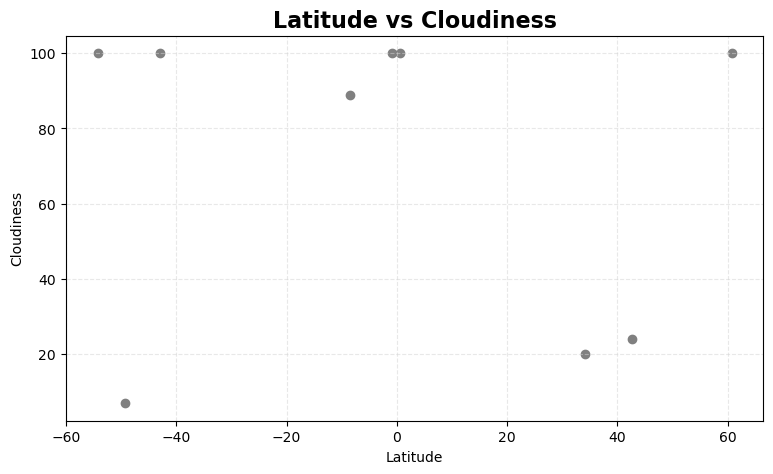

In [83]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,5))
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"], color="grey")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

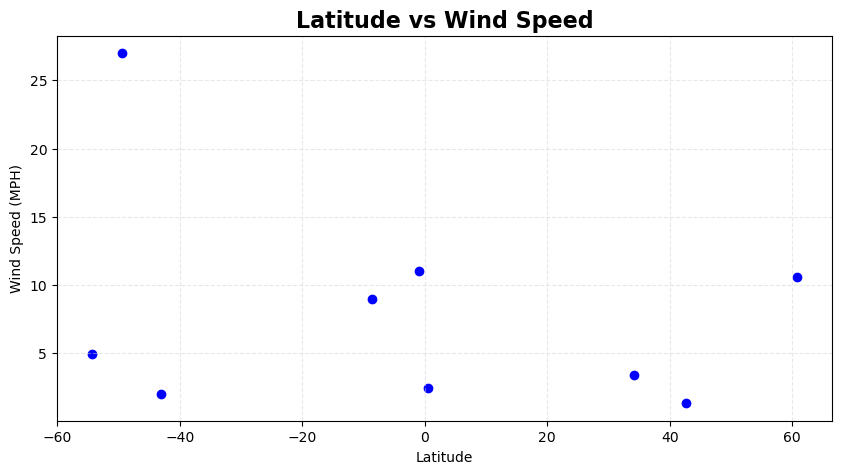

In [82]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,5))
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [113]:
# Define a function to create Linear Regression plots

def makeLinearRegressionPlot(x_values, y_values, y_col, hemi, annot_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # make plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq, annot_loc, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f'{y_col}')
    plt.title(f'Latitude vs {y_col} ({hemi} Hemi)')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [114]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,makokou,0.5738,12.8642,77.34,83,100,2.48,GA,1700042390
2,port hueneme,34.1478,-119.1951,62.83,44,20,3.44,US,1700042369
3,albany,42.6001,-73.9662,31.73,89,24,1.34,US,1700042394
4,lensk,60.7253,114.9278,10.40,88,100,10.56,RU,1700042396


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat <0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,39.36,66,7,26.98,TF,1700042392
5,puerto baquerizo moreno,-0.9000,-89.6000,73.53,87,100,11.03,EC,1700042397
6,atafu village,-8.5421,-172.5159,83.70,78,89,9.01,TK,1700042433
7,blackmans bay,-43.0167,147.3167,55.53,57,100,1.99,AU,1700042434
8,grytviken,-54.2811,-36.5092,36.05,96,100,4.97,GS,1700042361


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8612949164773429


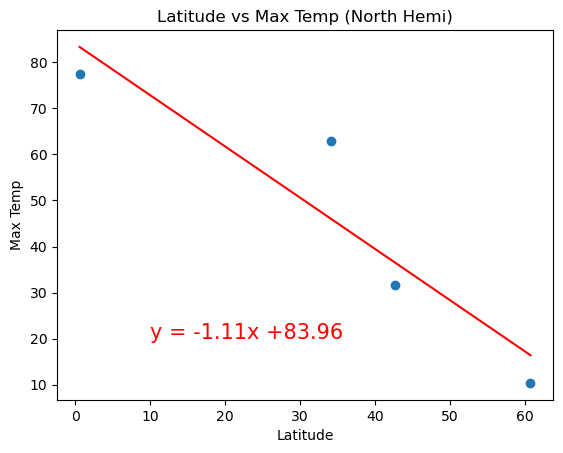

In [115]:
# Linear regression on Northern Hemisphere
# print out r-squared value along with the plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values, y_values, "Max Temp", "North", (10,20))

The r-squared is: 0.878863552732782


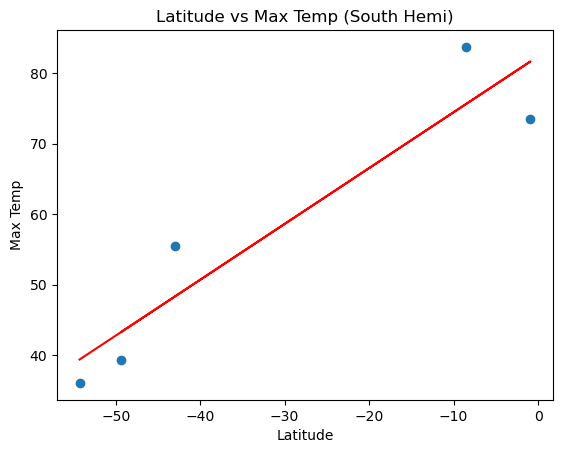

In [116]:
# Linear regression on Southern Hemisphere
# Print out r-squared value along with the plot

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values, y_values, "Max Temp", "South", (10,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0142275346576266


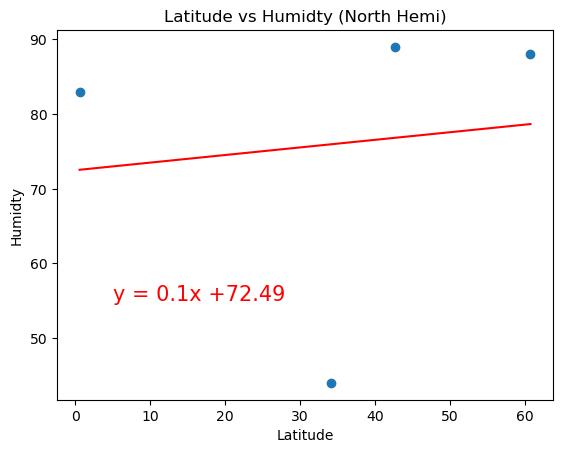

In [118]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidty", "North", (5,55))

The r-squared is: 0.04364897871411835


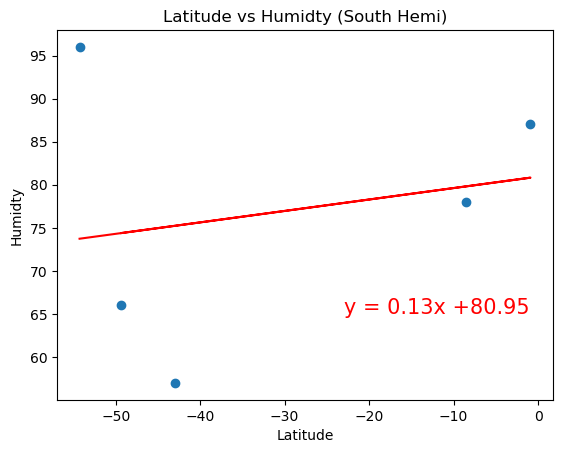

In [122]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidty", "South", (-23,65))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02955709898029954


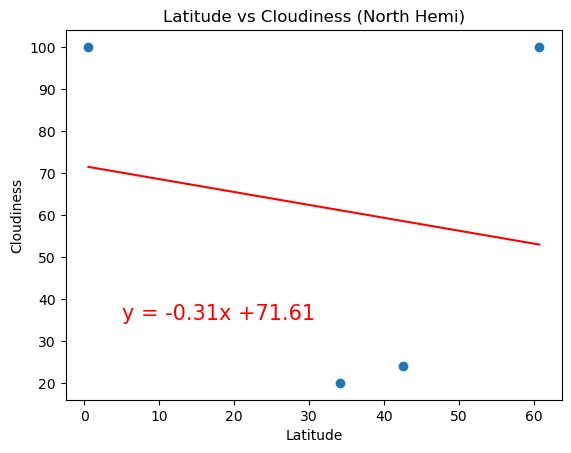

In [124]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "North", (5,35))

The r-squared is: 0.12842173963431505


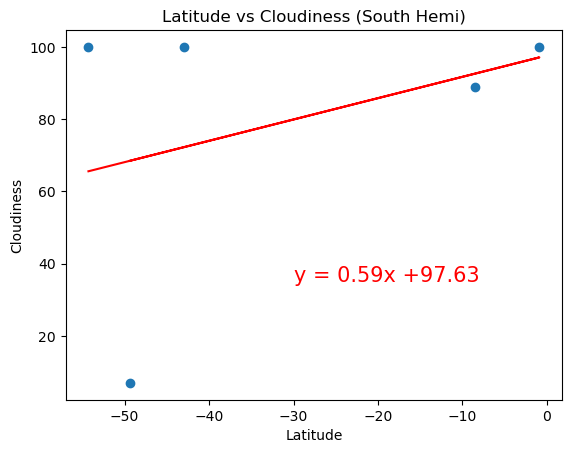

In [126]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "South", (-30,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.4137384181881523


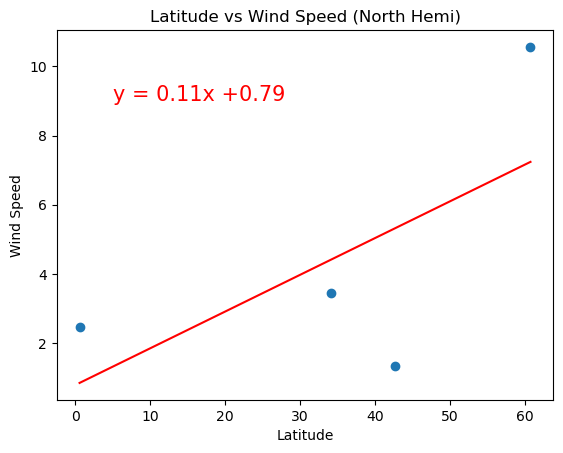

In [128]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "North", (5,9))

The r-squared is: 0.008562851298317105


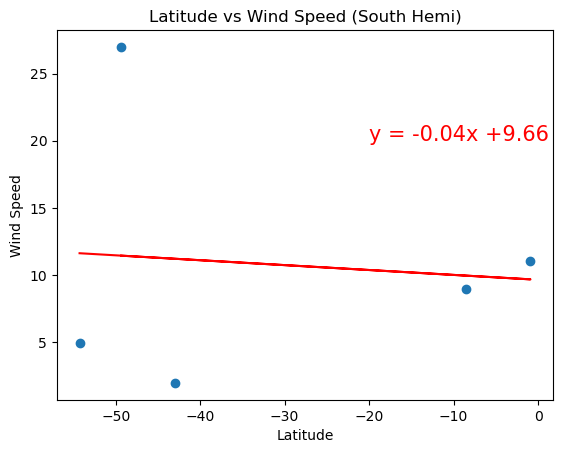

In [130]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "South", (-20,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE